In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
WAV_FILE = 'shortpassagea_CT.wav'
N_MELS = 256
MEL_SPEC_FRAME_SIZE = 1024

In [3]:
def spectrogram(wavfile_path, chunk_seconds=None, plot=False, log_plot=False):
    sig, fs = librosa.load(wavfile_path, sr=16000)

    # normalize between [-1,1]
    sig /= np.max(np.abs(sig), axis=0)

    if not chunk_seconds:
        chunk_samples = len(sig)
    else:
        # get first few seconds
        chunk_samples = fs * chunk_seconds

    spectrogram = librosa.stft(sig[0:0 + chunk_samples])
    spectrogram = librosa.amplitude_to_db(np.abs(spectrogram), ref=1.0)

    # # normalize to [0,1]
    # scaler = MinMaxScaler(feature_range=(0, 1), copy=False, clip=True)
    # scaler.fit_transform(spectrogram)

    if plot:
        plt.figure(figsize=(20, 8))
        plt.xlabel('Time')
        plt.ylabel('Mel-Frequency')

        scale='linear'
        if log_plot:
            scale='log'

        librosa.display.specshow(spectrogram,
                                 y_axis=scale,
                                 fmax=fs / 2,
                                 sr=fs,
                                 hop_length=int(MEL_SPEC_FRAME_SIZE / 2),
                                 x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Linear Spectrogram')
        plt.tight_layout()
        plt.show()

    return spectrogram

In [4]:
def mel_spectrogram(wavfile_path, chunk_seconds=None, plot=False):
    sig, fs = librosa.load(wavfile_path, sr=16000)
    # mel_spec_frame_size = int(fs * 0.03)

    # normalize between [-1,1]
    sig /= np.max(np.abs(sig), axis=0)

    if not chunk_seconds:
        chunk_samples = len(sig)
    else:
        # get first few seconds
        chunk_samples = fs * chunk_seconds

    melspec = librosa.feature.melspectrogram(y=sig[0:0 + chunk_samples],
                                             sr=fs,
                                             center=True,
                                             n_fft=MEL_SPEC_FRAME_SIZE,
                                             hop_length=int(MEL_SPEC_FRAME_SIZE / 2),
                                             n_mels=N_MELS)
    melspec = librosa.power_to_db(melspec, ref=1.0)

    # # normalize to [0,1]
    # scaler = MinMaxScaler(feature_range=(0, 1), copy=False, clip=True)
    # scaler.fit_transform(melspec)

    if plot:
        plt.figure(figsize=(20, 8))
        plt.xlabel('Time')
        plt.ylabel('Mel-Frequency')
        librosa.display.specshow(melspec,
                                 y_axis='mel',
                                 fmax=fs / 2,
                                 sr=fs,
                                 hop_length=int(MEL_SPEC_FRAME_SIZE / 2),
                                 x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.tight_layout()
        plt.show()

    return melspec, fs

In [5]:
def mfcc_coefficients(wavfile_path, filters=20,plot=False):
    melspec, fs = mel_spectrogram(wavfile_path=wavfile_path, chunk_seconds=5, plot=False)
    mfccs = librosa.feature.mfcc(S=melspec,n_mfcc=filters)

    if plot:
        plt.figure(figsize=(20, 8))
        plt.xlabel('Time')
        plt.ylabel('MFCC Coefficient')
        librosa.display.specshow(mfccs,
                                 fmax=fs / 2,
                                 sr=fs,
                                 hop_length=int(MEL_SPEC_FRAME_SIZE / 2),
                                 x_axis='time')
        # plt.colorbar(format='%+2.0f dB')
        plt.title('MFCC Coefficients')
        plt.tight_layout()
        plt.show()

    return mfccs

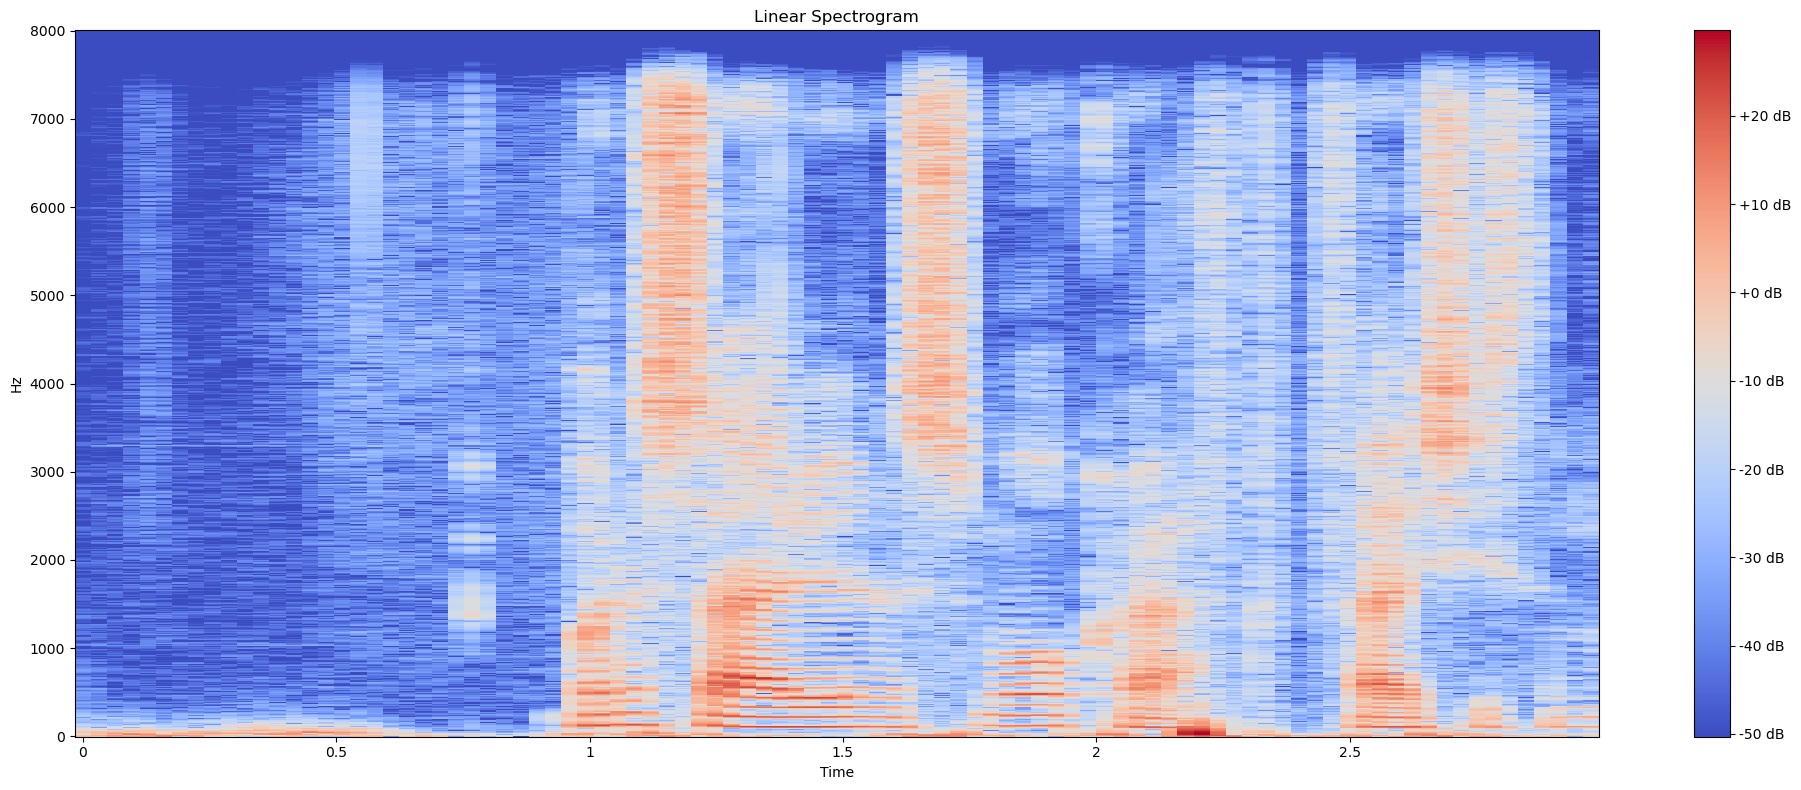

In [6]:
spectrogram = spectrogram(wavfile_path=WAV_FILE, chunk_seconds=3, plot=True, log_plot=False)

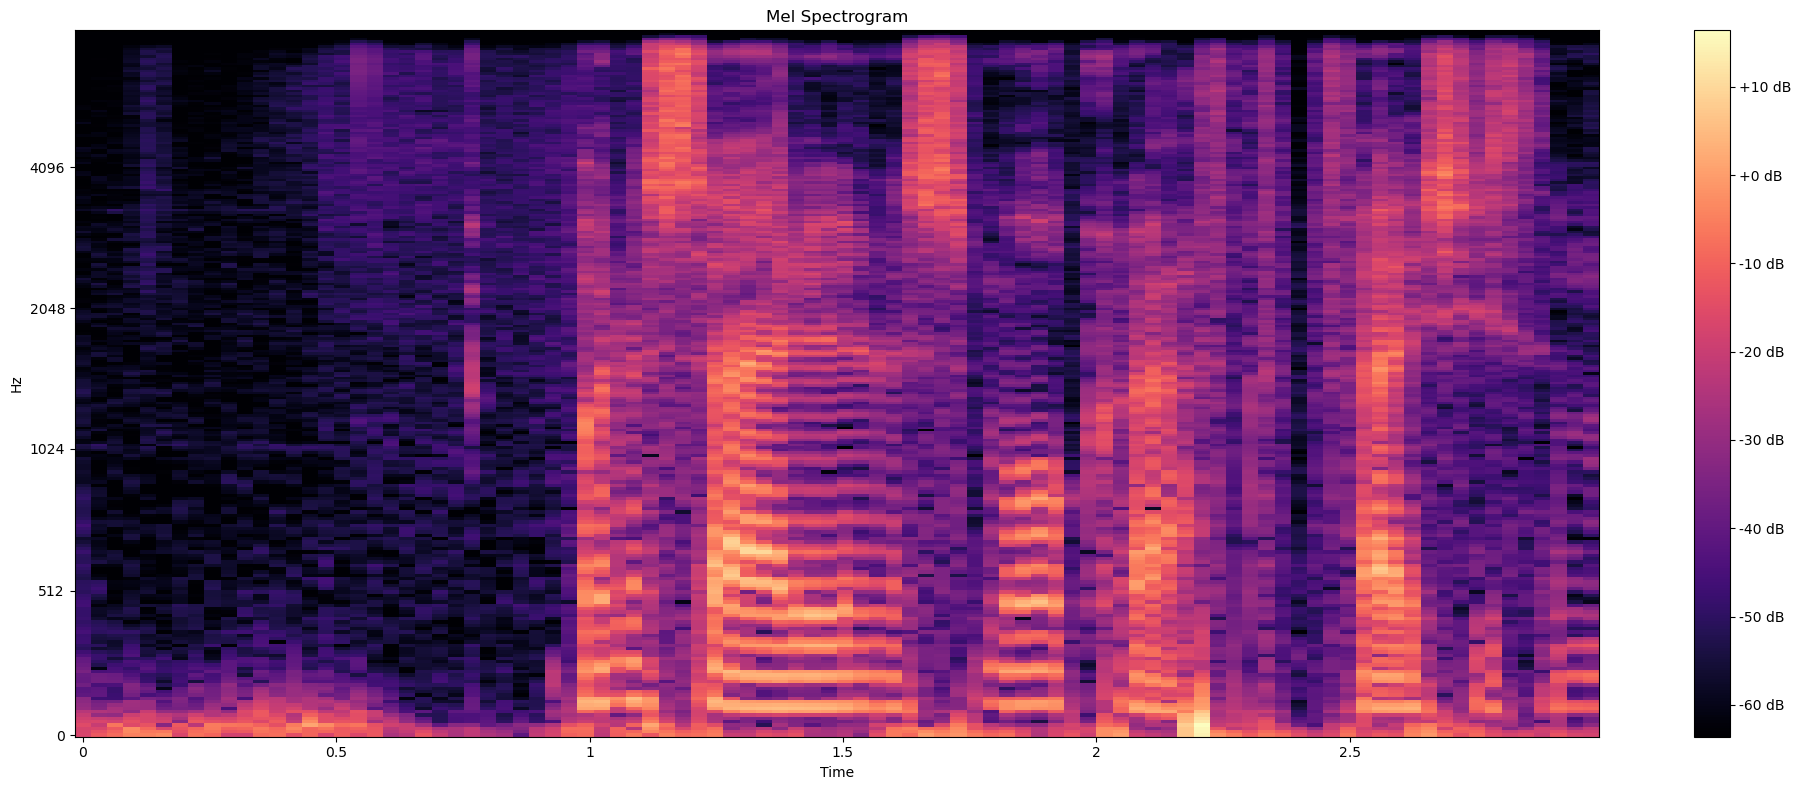

In [7]:
melSpectrogram,fs = mel_spectrogram(wavfile_path=WAV_FILE, chunk_seconds=3, plot=True)

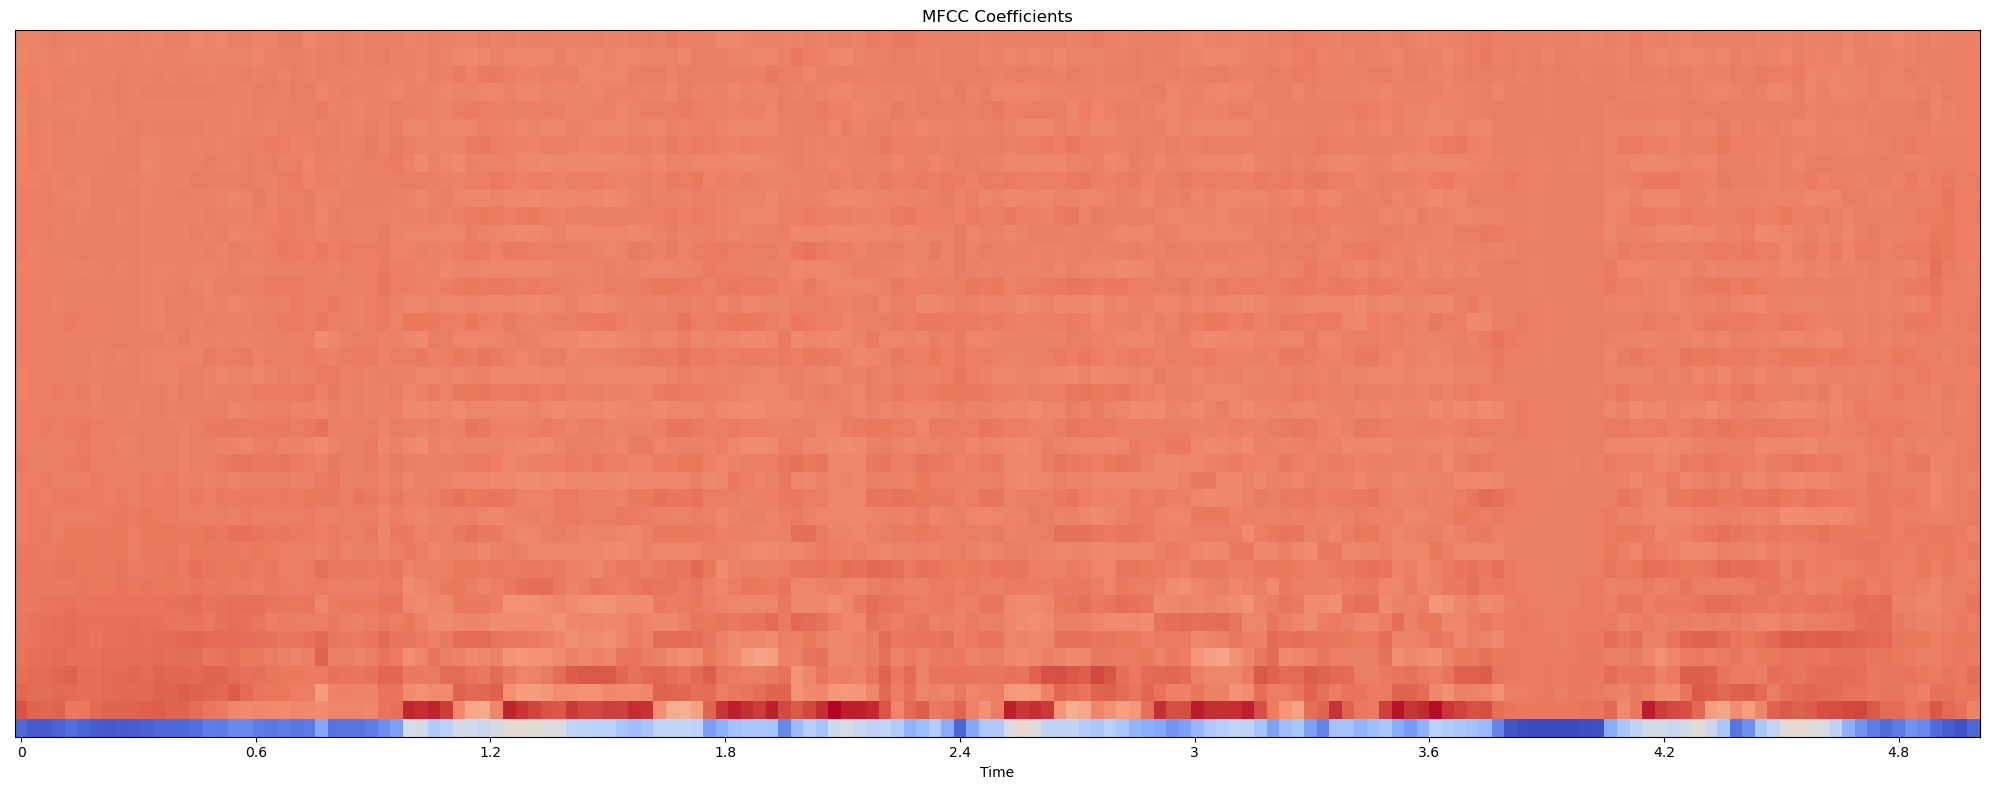

In [8]:
mfccs = mfcc_coefficients(wavfile_path=WAV_FILE, filters=40, plot=True)